# Time Series Analyzis

In [1]:
import pandas as pd

In [2]:
air_passenger_data = pd.read_csv("AirPassengers.csv")
air_passenger_data = air_passenger_data.rename(columns={"#Passengers":"Passengers"})
air_passenger_data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## Time Series Plot

In [3]:
import matplotlib.pyplot as plt
import numpy as np

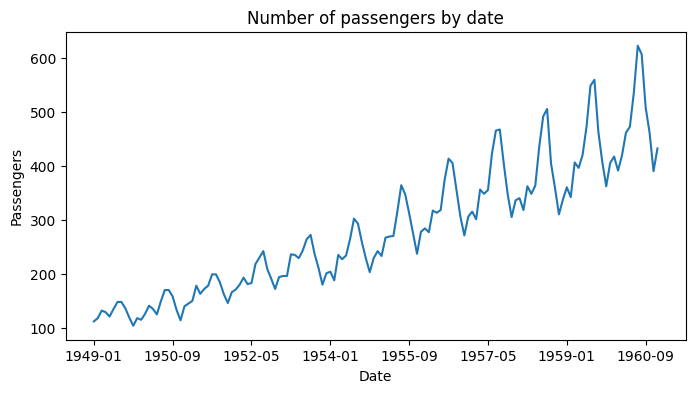

In [4]:
# Setting the figure size
fig, ax = plt.subplots(1, figsize = (8, 4))

# Plotting the time series of given data
plt.plot(air_passenger_data["Month"],air_passenger_data["Passengers"])
 
# Giving title to the chart using plt.title
plt.title('Number of passengers by date')

# Setting the number of ticks
ax.xaxis.set_major_locator(plt.AutoLocator())

# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Passengers')

plt.show()

#### <font color='#008B8B'>Time Series Plot seems to have increasing trend and seasonability</font>.

## All the main plots for main data

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
data = air_passenger_data["Passengers"]

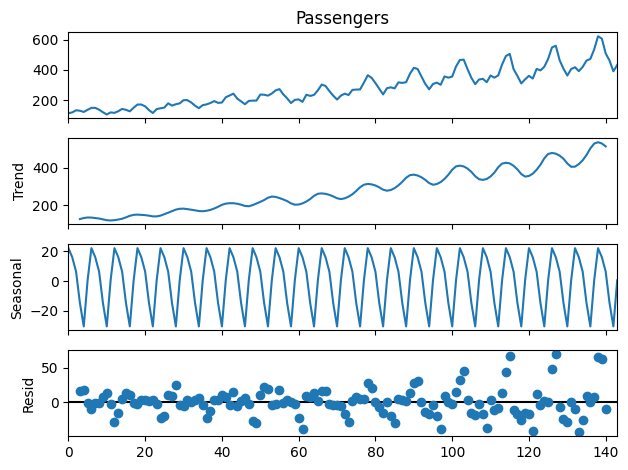

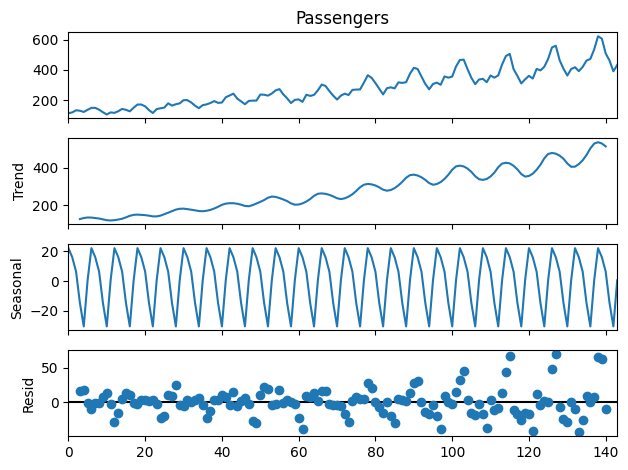

In [7]:
decomoposition = seasonal_decompose(data,period=6)
decomoposition.plot()

## Autocorrelation

In [8]:
import statsmodels.api as sm

In [9]:
acf = sm.tsa.stattools.acf(data,nlags=50)

In [10]:
acf

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092, 0.13840041, 0.11140324, 0.09098453, 0.08217177,
       0.08877222, 0.10386958, 0.12393082, 0.13263456, 0.10374723,
       0.06209805])

<StemContainer object of 3 artists>

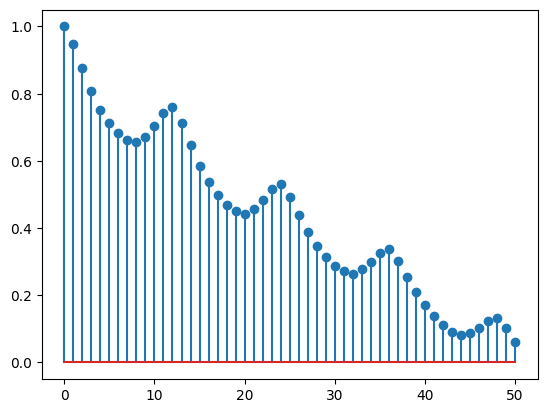

In [11]:
plt.stem(range(0,len(acf)),acf)

#### <font color='#008B8B'>Autocorrelation and dependency from past values is decreasing. Peaking in every 12 months is showing that there is a seasonal data</font>.

## Augmented Dickey-Fuller (ADF) test

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def adf_test(series):
    test_results = adfuller(series)
    print('ADF Statistic : ', test_results[0])
    print ('P Value : ', test_results [1])
    print ('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f'%(thres, adf_stat))

In [14]:
adf_test(data[12:])

ADF Statistic :  0.6881294666354533
P Value :  0.9895979711742349
Critical Values:
	1%: -3.49
	5%: -2.89
	10%: -2.58


#### <font color='#008B8B'>The ADF statistic is higher than any of the critical values and p-value > 0.05 implies that the time series is in fact</font> <font color='#B22222'>non-stationary</font>.

## Trend removement

In [15]:
rolling_mean = data.rolling(window=12).mean()

<Axes: title={'center': 'Rolling Mean over 12 month period'}>

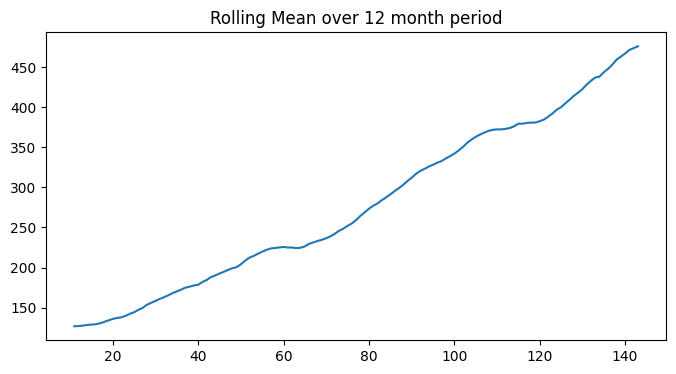

In [16]:
rolling_mean.plot(figsize=(8,4), title="Rolling Mean over 12 month period")

#### <font color='#008B8B'>Mean value increases and there is a visuable trend.</font>

In [17]:
detrended = data - rolling_mean

<Axes: title={'center': 'Plot without a trend'}>

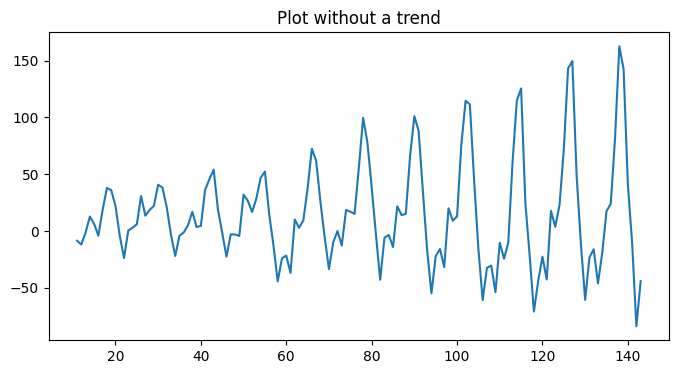

In [18]:
detrended.plot(figsize=(8,4), title="Plot without a trend")

---------------------------------------------------------------------------------------------------------------

In [19]:
detrended = detrended[detrended.notnull()]

In [20]:
acf2 = sm.tsa.stattools.acf(detrended)

In [21]:
acf2

array([ 1.        ,  0.7074319 ,  0.23103416, -0.17118514, -0.42432487,
       -0.48496268, -0.48701929, -0.45430766, -0.37790083, -0.13534412,
        0.20537174,  0.59525179,  0.82938038,  0.59133679,  0.18134495,
       -0.16092423, -0.36282545, -0.41407358, -0.42833129, -0.41737499,
       -0.3636162 , -0.14563061])

<StemContainer object of 3 artists>

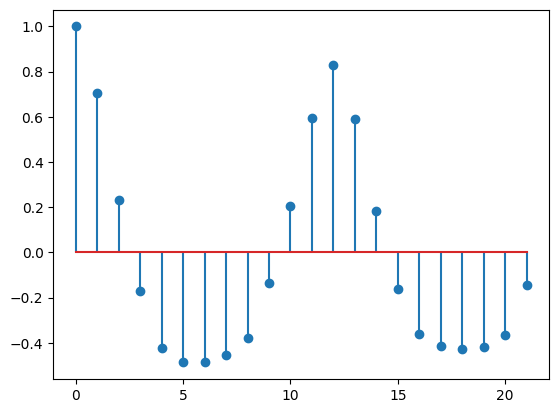

In [22]:
plt.stem(range(0,len(acf2)),acf2)

#### <font color='#008B8B'>There is still autocorrelation between values and seasonability still exists (peak every 12 months). But trend is removed.</font>

## Seasonality removement

<Axes: >

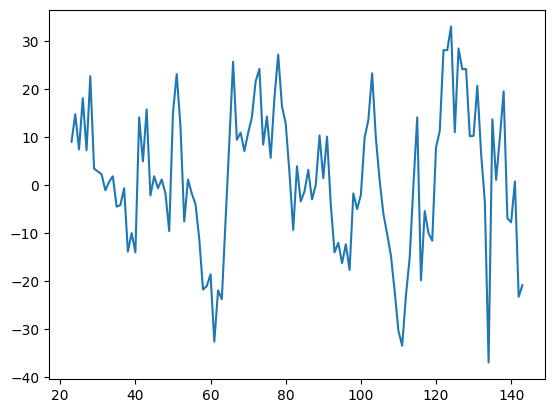

In [23]:
data_cleared = detrended.diff(periods=12)
data_cleared = data_cleared[data_cleared.notnull()]
data_cleared.plot()

<StemContainer object of 3 artists>

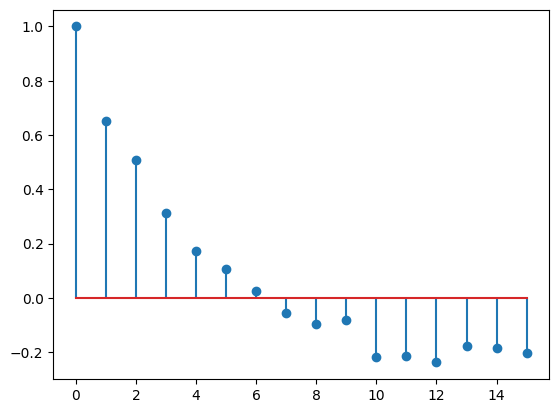

In [24]:
acf3 = sm.tsa.stattools.acf(data_cleared,nlags=15)
plt.stem(range(0,len(acf3)),acf3)

## ARIMA models

### Checking for the best fitting model for original data

In [25]:
from pmdarima.arima import auto_arima

In [26]:
model_org = auto_arima(data,trace=True,suppress_warnings=True)
results_org = model_org.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

### Predictions

In [27]:
predictions_org = model_org.predict(n_periods = 30)

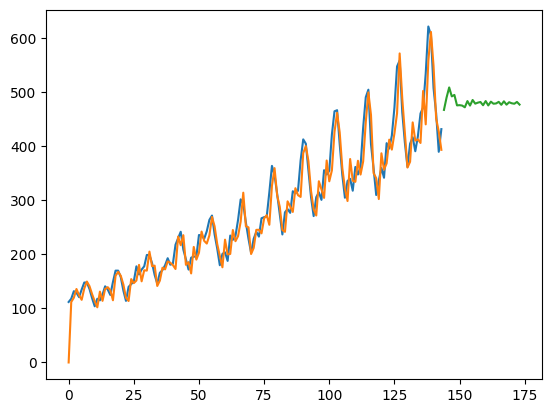

In [28]:
plt.plot(data)
plt.plot(results_org.fittedvalues())
plt.plot(predictions_org)

In [29]:
results_org.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Tue, 25 Jul 2023   AIC                           1365.825
Time:                        17:41:44   BIC                           1389.528
Sample:                             0   HQIC                          1375.457
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1715     85.615      8.458      0.000     556.368     891.975
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Checking for the best fitting model for cleared data

In [30]:
model_cleared = auto_arima(data_cleared,trace=True,suppress_warnings=True)
results_cleared = model_cleared.fit(data_cleared)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=933.009, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=999.334, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=933.048, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=961.190, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=998.418, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=931.082, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=938.997, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=932.906, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=932.937, Time=0.20 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=932.005, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=934.892, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=929.228, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=937.368, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=931.011, 

#### <font color='#008B8B'>Based on AIC values the best fitting model is ARMA(1,2).</font>

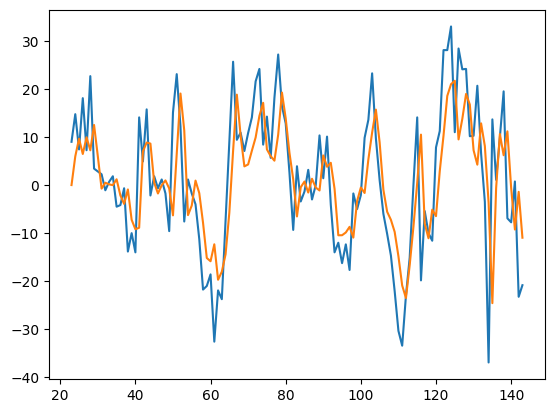

In [31]:
plt.plot(data_cleared)
plt.plot(results_cleared.fittedvalues())

In [32]:
results_cleared.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  121
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -460.614
Date:                Tue, 25 Jul 2023   AIC                            929.228
Time:                        17:41:52   BIC                            940.411
Sample:                             0   HQIC                           933.770
                                - 121                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5811      0.151      3.846      0.000       0.285       0.877
ma.L1          0.0027      0.143      0.019      0.985      -0.277       0.283
ma.L2          0.2613      0.143      1.833      0.067      -0.018       0.541
sigma2       117.8686     13.809      8.535      0.000      90.803     144.934
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.85
Prob(Q):                              0.98   Prob(JB):                         0.09
Heteroskedasticity (H):               2.14   Skew:                             0.05
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Checking residuals

In [33]:
residuals = results_cleared.resid()

<Axes: >

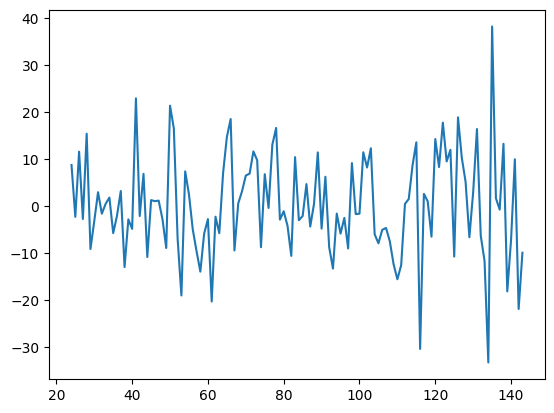

In [34]:
residuals[1:].plot()

### Minimal correlation

In [35]:
correlation_matrix = np.corrcoef(residuals[:-1],residuals[1:])

In [36]:
correlation_matrix

array([[ 1.        , -0.00128797],
       [-0.00128797,  1.        ]])